In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [44]:
chardatajeju_df = pd.read_excel('제주21년1월부터12월이상치+주소정리1.xlsx')
chardatajeju_df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,month
0,24,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",2021-01
1,29,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13,2021-01
2,33,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4,2021-01
3,35,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536,2021-01
4,41,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181584,2097129,제주,제주직할,노형아이파크,완속02,3519,제주특별자치도 제주시 노형동 원노형로 90,완속,7.0,18.90,3,7,2021-10-17,2021-10-16 22:08:32,2021-10-17 01:15:58,제주특별자치도,제주시,노형동 원노형로 90,2021-10
181585,2097135,제주,서귀포,중문메리디안,완속02,5849,제주특별자치도 서귀포시 중문동 1100로 36,완속,7.0,26.79,4,31,2021-10-17,2021-10-16 21:35:11,2021-10-17 02:06:26,제주특별자치도,서귀포시,중문동 1100로 36,2021-10
181586,2097137,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,32.33,5,54,2021-10-17,2021-10-16 21:05:09,2021-10-17 03:00:06,제주특별자치도,제주시,노형동 광평동로 66,2021-10
181587,2097143,제주,제주직할,제주으뜸마을LH 아파트,급속01,3610,제주특별자치도 제주시 노형동 진군1길 3,급속,50.0,16.88,0,29,2021-10-17,2021-10-17 12:22:40,2021-10-17 12:51:44,제주특별자치도,제주시,노형동 진군1길 3,2021-10


In [16]:
chardatajeju21_df = chardatajeju_df.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [17]:
chardatajeju21_df = chardatajeju21_df.drop_duplicates()
chardatajeju21_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
0,제주,서귀포,삼정지에듀,완속02,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,서귀포시
1,제주,제주직할,삼양2동 공영주차장,급속01,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,제주시
2,제주,제주직할,LH제주본부,급속01,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,제주시
3,제주,서귀포,삼아 아파트,완속02,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,서귀포시
4,제주,제주직할,아라인빌,완속01,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,제주시
...,...,...,...,...,...,...,...,...
175082,환경부,환경부,한국산업인력공단 제주지사,급속01,제주특별자치도 제주시 복지로 19,급속,NaN,제주시
175130,환경부,환경부,대정감협 인근 공영주차장,급속01,제주특별자치도 서귀포시 대정읍 하모리 964-2,급속,NaN,서귀포시
175276,환경부,환경부,제주농업기술센터,급속02,제주특별자치도 제주시 애월읍 상귀길 173,급속,NaN,제주시
177353,환경부,환경부,서귀포보건소,급속01,제주특별자치도 서귀포시 중앙로 101번길 52,급속,NaN,서귀포시


In [18]:
print(chardatajeju21_df['구'].value_counts())

제주시     477
서귀포시    191
Name: 구, dtype: int64


In [19]:
chardatajeju21_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         서귀포시
1          제주시
2          제주시
3         서귀포시
4          제주시
          ... 
175082     제주시
175130    서귀포시
175276     제주시
177353    서귀포시
179692     제주시
Name: 구, Length: 668, dtype: object>

In [20]:
# 2021년 제주도 구별 충전소 가동률
np.round(chardatajeju21_df['구'].value_counts().div(668),2)

제주시     0.71
서귀포시    0.29
Name: 구, dtype: float64

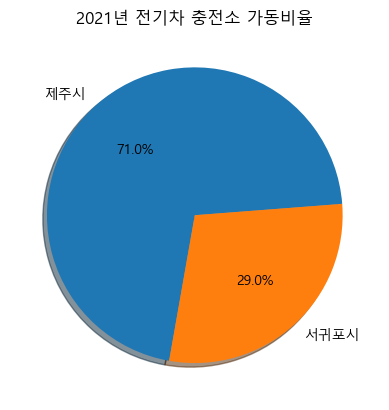

In [21]:
# 2021년 전기차 충전소 가동비율 그래프
ratio = [71,29]
labels = ['제주시', '서귀포시']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('2021년 전기차 충전소 가동비율')
plt.show()

In [22]:
# 2021년 제주도 전기차 충전소 급속, 완속 충전기합
print(chardatajeju21_df['충전기구분'].value_counts())

급속    446
완속    222
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

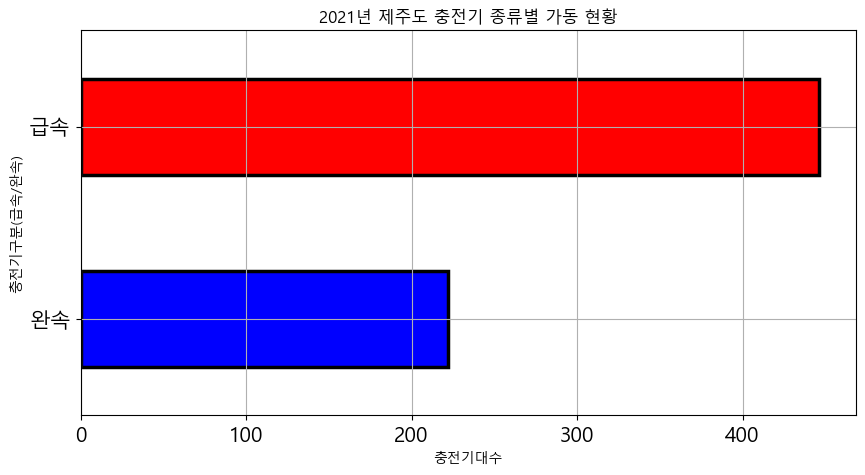

In [35]:
# 21년도 충전기 대수 가동 현황 총합 (완속, 급속)

chargerjeju21dist = pd.value_counts(chardatajeju21_df['충전기구분'].values, sort=True, ascending = True)
chargerjeju21dist.plot.barh()
chargerjeju21dist.plot.barh(grid=True, color = ['blue', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.title('2021년 제주도 충전기 종류별 가동 현황')
plt.xlabel('충전기대수')
plt.ylabel('충전기구분(급속/완속)')

In [24]:
# 2021년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju21_df = chardatajeju21_df[['구', '충전기구분']]
chargerjeju21_df = chargerjeju21_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargerjeju21_df)

0
구    충전기구분     
서귀포시 급속     151
     완속      40
제주시  급속     295
     완속     182

Text(0, 0.5, '충전기대수')

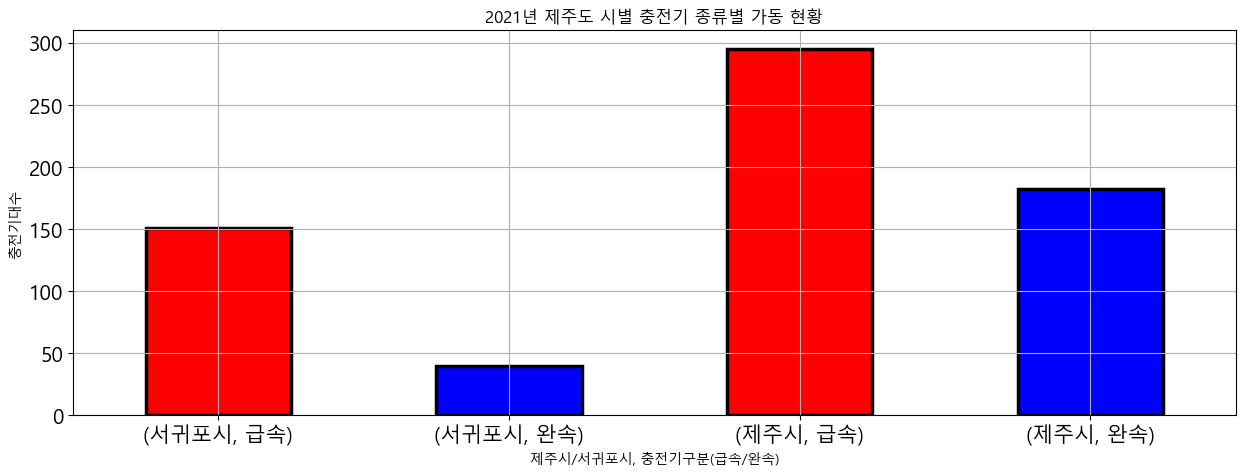

In [37]:
# 2020년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chargerjeju21_df.plot.bar()
chargerjeju21_df.plot.bar(grid=True, color = ['red', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=15)
plt.xticks(rotation = 360)
plt.title('2021년 제주도 시별 충전기 종류별 가동 현황')
plt.xlabel('제주시/서귀포시, 충전기구분(급속/완속)')
plt.ylabel('충전기대수')

In [38]:
# 2021년도 전기차충전소 사용빈도(제주시/서귀포시)
print(chardatajeju_df['구'].value_counts())

제주시     131162
서귀포시     50427
Name: 구, dtype: int64


Text(0, 0.5, '제주시/서귀포시')

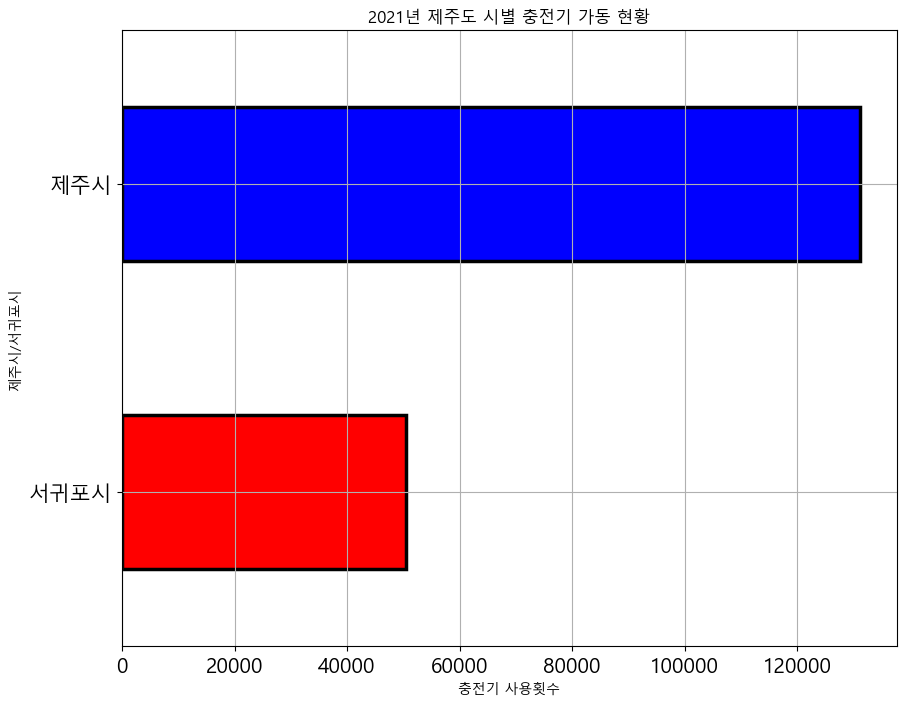

In [39]:
# 2021년도 제주도 전기차 충전소 사용 빈도 시각화

chargecountjeju21_df = pd.value_counts(chardatajeju_df['구'].values, sort=True, ascending = True)
chargecountjeju21_df.plot.barh()
chargecountjeju21_df.plot.barh(grid=True, color = ['red', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2021년 제주도 시별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('제주시/서귀포시')

In [40]:
# 2021년도 전기차충전소 사용빈도(급속/완속)
print(chardatajeju_df['충전기구분'].value_counts())

급속    131692
완속     49897
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

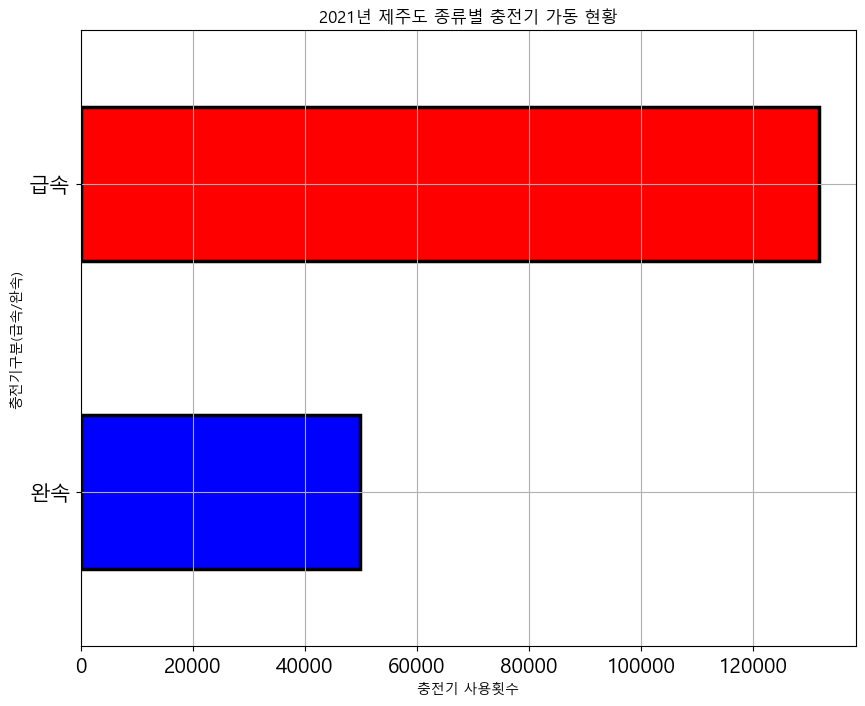

In [43]:
# 2021년도 제주도 전기차 충전소(급속/완속) 사용 빈도 시각화

chargetypecountjeju21_df = pd.value_counts(chardatajeju_df['충전기구분'].values, sort=True, ascending = True)
chargetypecountjeju21_df.plot.barh()
chargetypecountjeju21_df.plot.barh(grid=True, color = ['blue', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2021년 제주도 종류별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('충전기구분(급속/완속)')

In [50]:
jeju = chardatajeju_df[chardatajeju_df['구'] == '제주시']
jeju_fast = jeju[jeju['충전기구분'] == '완속']
jeju_slow = jeju[jeju['충전기구분'] == '급속']

In [51]:
seogwipo = chardatajeju_df[chardatajeju_df['구'] == '서귀포시']
seogwipo_fast = seogwipo[seogwipo['충전기구분'] == '완속']
seogwipo_slow = seogwipo[seogwipo['충전기구분'] == '급속']

In [56]:
tour2021 = pd.read_excel('2021년제주여행객.xlsx')
tour2021 = tour2021.drop('Unnamed: 0', axis=1)

In [57]:
tour2021.rename(columns = {'군구':'구'}, inplace=True)
tour2021.head(3)

,시도,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,제주특별자치도,제주시,국립제주박물관,합계,174405,91511,7249,6391,3378,4820,6339,6861,9060,8880,3748,6038,8040,20707
1,제주특별자치도,제주시,도립미술관,합계,65094,37477,926,2025,2460,2620,2961,2372,4565,4839,2783,4484,3879,3563
2,제주특별자치도,제주시,만장굴관광지,합계,646332,335484,7282,12826,17903,17909,30851,31024,51526,49338,27402,34315,29959,25149


In [58]:
je = tour2021[tour2021['구'] == '제주시']
je[je['내/외국인'] == '합계'].reset_index()

,index,시도,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,0,제주특별자치도,제주시,국립제주박물관,합계,174405,91511,7249,6391,3378,4820,6339,6861,9060,8880,3748,6038,8040,20707
1,1,제주특별자치도,제주시,도립미술관,합계,65094,37477,926,2025,2460,2620,2961,2372,4565,4839,2783,4484,3879,3563
2,2,제주특별자치도,제주시,만장굴관광지,합계,646332,335484,7282,12826,17903,17909,30851,31024,51526,49338,27402,34315,29959,25149
3,3,제주특별자치도,제주시,민속자연사박물관,합계,140613,80385,3337,4975,6030,7646,7846,5281,6653,7162,6408,7596,9694,7757
4,4,제주특별자치도,제주시,비자림,합계,1222341,614396,18250,28841,40474,40163,69626,55092,62858,50135,51401,77407,71296,48853
5,5,제주특별자치도,제주시,삼양선사유적지,합계,30934,14808,728,1202,1429,1633,1595,1316,1101,875,948,1261,1475,1245
6,6,제주특별자치도,제주시,절물자연휴양림,합계,1001539,456216,5384,19539,24528,44212,52473,49791,44421,41381,34976,55882,53140,30489
7,7,제주특별자치도,제주시,제주도립 김창열미술관,합계,82097,60116,2562,3480,4361,4946,5477,5267,7435,6591,4428,6207,4939,4423
8,8,제주특별자치도,제주시,제주돌문화공원,합계,171534,104638,2227,4525,4712,7408,8109,5899,4635,4284,6048,13854,26904,16033
9,9,제주특별자치도,제주시,제주목관아지,합계,99628,43860,1920,3619,4250,4891,4697,3304,2510,2337,2948,5172,4899,3313


In [59]:
seo = tour2021[tour2021['구'] == '서귀포시']
seo[seo['내/외국인'] == '합계'].reset_index()

,index,시도,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,16,제주특별자치도,서귀포시,감귤박물관,합계,82428,48715,1580,2345,1650,2996,3909,4096,6958,5894,3587,5338,5550,4812
1,17,제주특별자치도,서귀포시,기당미술관,합계,20187,12957,767,1136,1046,1035,1232,1137,1381,1159,984,1216,945,919
2,18,제주특별자치도,서귀포시,마라해양도립공원,합계,1116994,635253,13018,18803,50463,89984,82855,54244,28788,31411,43718,81599,89329,51041
3,19,제주특별자치도,서귀포시,박물관은살아있다,합계,312948,151610,5718,11790,10205,11240,13866,12858,18114,18330,10534,13359,13506,12090
4,20,제주특별자치도,서귀포시,산방산,합계,631900,252676,6831,12730,16888,23745,33659,24690,12724,10305,13891,18944,41527,36742
5,21,제주특별자치도,서귀포시,서귀포도립해양공원,합계,167633,94201,1853,5007,7161,10894,11357,10670,7014,7309,6122,10402,10775,5637
6,22,제주특별자치도,서귀포시,서귀포자연휴양림,합계,281254,139723,2036,5875,7625,11836,14223,13608,16062,16392,12732,17763,15568,6003
7,23,제주특별자치도,서귀포시,서복전시관,합계,28717,18998,851,1484,1550,1815,2213,1356,1329,1370,1307,2065,2148,1510
8,24,제주특별자치도,서귀포시,성산일출봉,합계,1043040,482990,15170,24637,34440,34002,47262,37523,39149,33938,36421,60921,65121,54406
9,25,제주특별자치도,서귀포시,이중섭미술관,합계,114057,67490,2791,3140,4806,5407,5249,3588,6851,3502,4096,6796,10223,11041


In [60]:
tour2021 = tour2021.T
tour2021

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
시도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,...,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도
구,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,...,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시
관광지,국립제주박물관,도립미술관,만장굴관광지,민속자연사박물관,비자림,삼양선사유적지,절물자연휴양림,제주도립 김창열미술관,제주돌문화공원,제주목관아지,...,일출랜드,정방폭포,제주국제평화센터,제주추사관,중문대포해안주상절리대,천제연폭포,천지연폭포,카멜리아힐,퍼시픽랜드,한화아쿠아플라넷제주
내/외국인,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
21년총계,174405,65094,646332,140613,1222341,30934,1001539,82097,171534,99628,...,183314,997498,11351,43969,1186806,619942,1529927,918659,233601,1130857
인원계,91511,37477,335484,80385,614396,14808,456216,60116,104638,43860,...,97370,538304,6126,21652,649820,346263,814491,504815,123427,675638
2021-01,7249,926,7282,3337,18250,728,5384,2562,2227,1920,...,1555,16707,1,0,21626,9607,22416,13453,3547,20324
2021-02,6391,2025,12826,4975,28841,1202,19539,3480,4525,3619,...,3653,28025,270,1621,39632,16934,42358,20418,8133,46672
2021-03,3378,2460,17903,6030,40474,1429,24528,4361,4712,4250,...,5398,37543,216,2975,49526,24352,57071,25674,8515,43885
2021-04,4820,2620,17909,7646,40163,1633,44212,4946,7408,4891,...,9690,52664,645,3592,64703,32717,84989,36509,11386,53856


In [61]:
tour2021 = tour2021.drop(index='시도')
tour2021

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
구,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,제주시,...,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시
관광지,국립제주박물관,도립미술관,만장굴관광지,민속자연사박물관,비자림,삼양선사유적지,절물자연휴양림,제주도립 김창열미술관,제주돌문화공원,제주목관아지,...,일출랜드,정방폭포,제주국제평화센터,제주추사관,중문대포해안주상절리대,천제연폭포,천지연폭포,카멜리아힐,퍼시픽랜드,한화아쿠아플라넷제주
내/외국인,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
21년총계,174405,65094,646332,140613,1222341,30934,1001539,82097,171534,99628,...,183314,997498,11351,43969,1186806,619942,1529927,918659,233601,1130857
인원계,91511,37477,335484,80385,614396,14808,456216,60116,104638,43860,...,97370,538304,6126,21652,649820,346263,814491,504815,123427,675638
2021-01,7249,926,7282,3337,18250,728,5384,2562,2227,1920,...,1555,16707,1,0,21626,9607,22416,13453,3547,20324
2021-02,6391,2025,12826,4975,28841,1202,19539,3480,4525,3619,...,3653,28025,270,1621,39632,16934,42358,20418,8133,46672
2021-03,3378,2460,17903,6030,40474,1429,24528,4361,4712,4250,...,5398,37543,216,2975,49526,24352,57071,25674,8515,43885
2021-04,4820,2620,17909,7646,40163,1633,44212,4946,7408,4891,...,9690,52664,645,3592,64703,32717,84989,36509,11386,53856
2021-05,6339,2961,30851,7846,69626,1595,52473,5477,8109,4697,...,8843,56131,502,3726,66385,35130,89379,51533,14343,63486


In [62]:
cols = list(range(2, 36, 3))  # 2부터 108까지 3씩 증가하는 인덱스 리스트
result = tour2021.iloc[:, cols]  # 해당 인덱스에 해당하는 열들만 선택
result

,2,5,8,11,14,17,20,23,26,29,32,35
구,제주시,제주시,제주시,제주시,제주시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시,서귀포시
관광지,만장굴관광지,삼양선사유적지,제주돌문화공원,제주항일기념관,항몽 유적지,기당미술관,산방산,서복전시관,일출랜드,제주추사관,천지연폭포,한화아쿠아플라넷제주
내/외국인,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
21년총계,646332,30934,171534,118774,168072,20187,631900,28717,183314,43969,1529927,1130857
인원계,335484,14808,104638,66370,86242,12957,252676,18998,97370,21652,814491,675638
2021-01,7282,728,2227,4165,3178,767,6831,851,1555,0,22416,20324
2021-02,12826,1202,4525,3860,4342,1136,12730,1484,3653,1621,42358,46672
2021-03,17903,1429,4712,6201,6699,1046,16888,1550,5398,2975,57071,43885
2021-04,17909,1633,7408,7128,8890,1035,23745,1815,9690,3592,84989,53856
2021-05,30851,1595,8109,7637,10053,1232,33659,2213,8843,3726,89379,63486


In [63]:
jejudo2021 = result.T
jejudo2021

,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
2,제주시,만장굴관광지,합계,646332,335484,7282,12826,17903,17909,30851,31024,51526,49338,27402,34315,29959,25149
5,제주시,삼양선사유적지,합계,30934,14808,728,1202,1429,1633,1595,1316,1101,875,948,1261,1475,1245
8,제주시,제주돌문화공원,합계,171534,104638,2227,4525,4712,7408,8109,5899,4635,4284,6048,13854,26904,16033
11,제주시,제주항일기념관,합계,118774,66370,4165,3860,6201,7128,7637,7644,4822,5116,3981,6192,6192,3432
14,제주시,항몽 유적지,합계,168072,86242,3178,4342,6699,8890,10053,7973,7629,6968,6323,10363,9826,3998
17,서귀포시,기당미술관,합계,20187,12957,767,1136,1046,1035,1232,1137,1381,1159,984,1216,945,919
20,서귀포시,산방산,합계,631900,252676,6831,12730,16888,23745,33659,24690,12724,10305,13891,18944,41527,36742
23,서귀포시,서복전시관,합계,28717,18998,851,1484,1550,1815,2213,1356,1329,1370,1307,2065,2148,1510
26,서귀포시,일출랜드,합계,183314,97370,1555,3653,5398,9690,8843,8684,6796,5531,5714,9525,18998,12983
29,서귀포시,제주추사관,합계,43969,21652,0,1621,2975,3592,3726,2610,2922,2529,664,0,0,1013


In [64]:
jejudo2021[jejudo2021['구'] == '제주시']

,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
2,제주시,만장굴관광지,합계,646332,335484,7282,12826,17903,17909,30851,31024,51526,49338,27402,34315,29959,25149
5,제주시,삼양선사유적지,합계,30934,14808,728,1202,1429,1633,1595,1316,1101,875,948,1261,1475,1245
8,제주시,제주돌문화공원,합계,171534,104638,2227,4525,4712,7408,8109,5899,4635,4284,6048,13854,26904,16033
11,제주시,제주항일기념관,합계,118774,66370,4165,3860,6201,7128,7637,7644,4822,5116,3981,6192,6192,3432
14,제주시,항몽 유적지,합계,168072,86242,3178,4342,6699,8890,10053,7973,7629,6968,6323,10363,9826,3998


In [65]:
jeju2021 = jejudo2021.set_index('구')
jeju2021

,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
구,,,,,,,,,,,,,,,,
제주시,만장굴관광지,합계,646332,335484,7282,12826,17903,17909,30851,31024,51526,49338,27402,34315,29959,25149
제주시,삼양선사유적지,합계,30934,14808,728,1202,1429,1633,1595,1316,1101,875,948,1261,1475,1245
제주시,제주돌문화공원,합계,171534,104638,2227,4525,4712,7408,8109,5899,4635,4284,6048,13854,26904,16033
제주시,제주항일기념관,합계,118774,66370,4165,3860,6201,7128,7637,7644,4822,5116,3981,6192,6192,3432
제주시,항몽 유적지,합계,168072,86242,3178,4342,6699,8890,10053,7973,7629,6968,6323,10363,9826,3998
서귀포시,기당미술관,합계,20187,12957,767,1136,1046,1035,1232,1137,1381,1159,984,1216,945,919
서귀포시,산방산,합계,631900,252676,6831,12730,16888,23745,33659,24690,12724,10305,13891,18944,41527,36742
서귀포시,서복전시관,합계,28717,18998,851,1484,1550,1815,2213,1356,1329,1370,1307,2065,2148,1510
서귀포시,일출랜드,합계,183314,97370,1555,3653,5398,9690,8843,8684,6796,5531,5714,9525,18998,12983


In [66]:
jeju2021 = jeju2021.groupby(['구']).sum().reset_index().replace({'구': {'서귀포시': '서귀포시'}})
jeju2021

,구,관광지,내/외국인,21년총계,인원계,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,서귀포시,기당미술관산방산서복전시관일출랜드제주추사관천지연폭포한화아쿠아플라넷제주,합계합계합계합계합계합계합계,3568871,1893782,52744,109654,128813,178722,202538,176267,175245,163709,138939,185012,209446,172693
1,제주시,만장굴관광지삼양선사유적지제주돌문화공원제주항일기념관항몽 유적지,합계합계합계합계합계,1135646,607542,17580,26755,36944,42968,58245,53856,69713,66581,44702,65985,74356,49857


In [67]:
jeju2021 = jeju2021.drop(columns=['관광지', '내/외국인', '21년총계', '인원계'], axis=1)

In [68]:
jeju2021.T

,0,1
구,서귀포시,제주시
2021-01,52744,17580
2021-02,109654,26755
2021-03,128813,36944
2021-04,178722,42968
2021-05,202538,58245
2021-06,176267,53856
2021-07,175245,69713
2021-08,163709,66581
2021-09,138939,44702


In [69]:
new_jeju2021 = jeju2021.transpose()
new_jeju2021.columns = new_jeju2021.iloc[0]
new_jeju2021 = new_jeju2021.drop(new_jeju2021.index[0])
new_jeju2021

구,서귀포시,제주시
2021-01,52744,17580
2021-02,109654,26755
2021-03,128813,36944
2021-04,178722,42968
2021-05,202538,58245
2021-06,176267,53856
2021-07,175245,69713
2021-08,163709,66581
2021-09,138939,44702
2021-10,185012,65985


In [72]:
new_jeju2021['서귀포시'].sum()

1893782

In [73]:
new_jeju2021['제주시'].sum()

607542

In [ ]:
jeju_fast = jeju[jeju['충전기구분'] == '완속']
jeju_slow = jeju[jeju['충전기구분'] == '급속']
seogwipo_fast = seogwipo[seogwipo['충전기구분'] == '완속']
seogwipo_slow = seogwipo[seogwipo['충전기구분'] == '급속']

In [77]:
print(jeju['충전기구분'].value_counts())

급속    91977
완속    39185
Name: 충전기구분, dtype: int64


In [79]:
chardatajeju_df = chardatajeju_df[['구', '충전기구분']]
chardatajeju_df = chardatajeju_df.groupby(['구','충전기구분']).size()
pd.DataFrame(chardatajeju_df)

0
구    충전기구분       
서귀포시 급속     39715
     완속     10712
제주시  급속     91977
     완속     39185

In [87]:
pd.DataFrame(chardatajeju_df).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, ('서귀포시', '급속') to ('제주시', '완속')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int64
dtypes: int64(1)
memory usage: 340.0+ bytes


Text(0, 0.5, '충전횟수')

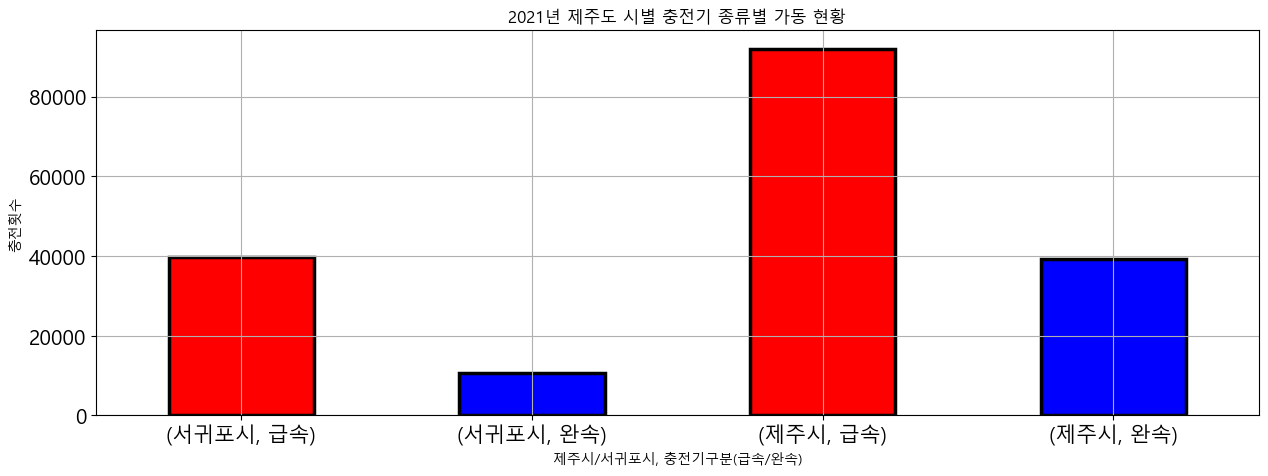

In [89]:
# 2021년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chardatajeju_df.plot.bar(grid=True, color = ['red', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=15)
plt.xticks(rotation = 360)
plt.title('2021년 제주도 시별 충전기 종류별 가동 현황')
plt.xlabel('제주시/서귀포시, 충전기구분(급속/완속)')
plt.ylabel('충전횟수')